# Kernel Support Vector Machine

Given a kernel function $k(\mathbf{x}, \mathbf{y})$, the objective function to be maximized is
\begin{equation}
L(\boldsymbol{\alpha}) = \sum_{n=1}^N \alpha_n - \frac{1}{2} \sum_{i=1}^N \sum_{n=1}^N \alpha_i \alpha_n c_i c_n \left( 1 + k(\mathbf{v}_i, \mathbf{v}_n) \right),
\end{equation}
subject to $\alpha_i \geq 0$, $i = 1, \ldots, N$. The classification is according to the sign of
\begin{equation}
- b + \sum_{n=1}^N \alpha_n c_n k(\mathbf{v}_n, \mathbf{v}).
\end{equation}
The Guassian kernel is given by
$\displaystyle k(\mathbf{x}, \mathbf{y}) = \exp \left( - \frac{ \| \mathbf{x} - \mathbf{y} \|^2}{2\gamma} \right)$.

Change the kernel coefficient and observe how the decision boundaries change.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
d = datasets.load_iris()
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.
# Iris virginica stored in the next 50 entries.

# Create a classification instance of the SVM.
s = svm.SVC(kernel="rbf",   # Gaussian kernel.
            gamma = 1.0,    # Kernel coefficient.
            tol=0.001)      # Stopping criterion.

# We consider sepal length and width, the first and second features.
# We consider petal length and width, the third and forth features.
# We train on the entire data.
# Number of samples, and therefore species.
# Two: 100,
# Three: 150
n = 150
X = d.data[0:n, 2:4] # Features 3 and 4.
y = d.target[0:n]
# Fit model.
s.fit(X, y)

SVC(gamma=1.0)

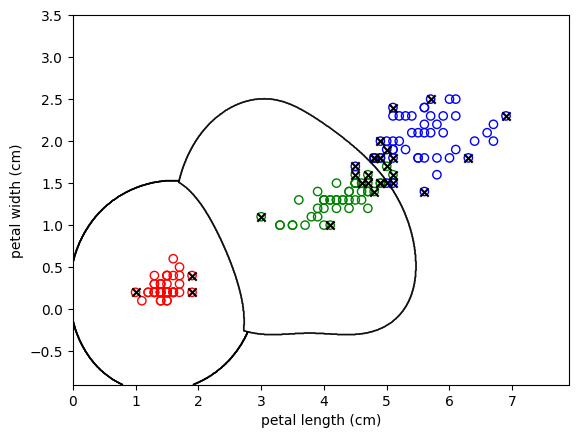

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
# Draw decision boundaries.
disp = DecisionBoundaryDisplay.from_estimator(
    s, X, grid_resolution =1000,
    response_method='predict',
    plot_method = 'contour',
    xlabel=d.feature_names[2], ylabel=d.feature_names[3],
    colors = 'k',
    linewidths = 1,
    alpha = 0.5
)
# Display data.
disp.ax_.scatter(X[:,0], X[:,1],
                     facecolors = 'none',
                     edgecolors = colours[0:n])
# Plot support vectors.
for i in range(s.support_vectors_.shape[0]):
  disp.ax_.scatter(s.support_vectors_[i][0], s.support_vectors_[i][1],
             c = 'k', marker = 'x')
plt.show()